# Descripcion del proyecto 

Evaluar los costos de marketing para Y.Afisha

In [1]:
# Importación de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Descarga de los archivos y lectura general de los datos
df_visitas = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],
)
df_pedidos = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
df_costos = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

#Convertir a minusculas el nombre las columnas
df_visitas.columns = df_visitas.columns.str.lower().str.replace(' ', '_')
df_pedidos.columns = df_pedidos.columns.str.lower().str.replace(' ', '_')

#Cambiamos el nombre de la columna
df_costos.rename(columns={'dt': 'date'}, inplace=True)


#Comprobamos si hay datos duplicados
df_visitas.duplicated().sum()
print(df_pedidos.duplicated().sum())

#Informacion general de cada DataFrame
df_visitas.info()
df_visitas.head()
df_costos.info()
df_costos.head()

# Unimos visitas con pedidos
df_unido = df_pedidos.merge(df_visitas, on='uid')

df_unido.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 761807 en

In [3]:
df_visitas.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
df_pedidos.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, bien con la revisión inicial de la data

</div>

## Informes y metricas

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

AxesSubplot(0.125,0.11;0.775x0.77)


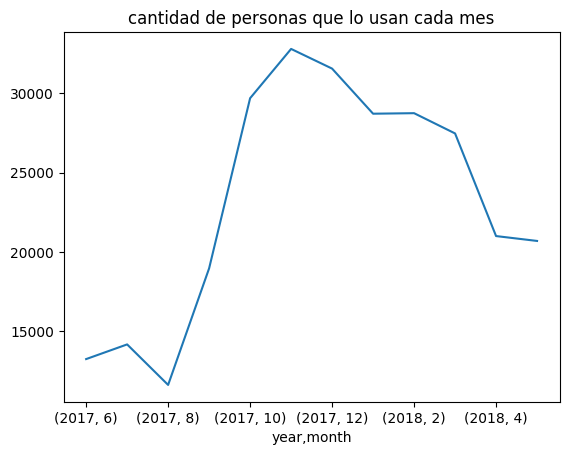

In [5]:
# Extraemos la información

df_visitas['day'] = df_visitas['start_ts'].dt.day
df_visitas['week'] = df_visitas['start_ts'].dt.week
df_visitas['month'] = df_visitas['start_ts'].dt.month
df_visitas['date'] = df_visitas['start_ts'].dt.date
df_visitas['year'] = df_visitas['start_ts'].dt.year


# Agrupamos por mes
per_month = df_visitas.groupby(['year', 'month'])['uid'].nunique()
print(per_month.plot(title='cantidad de personas que lo usan cada mes'))

Conclusiones del grafico:
- Se visualiza un gran aumento progresivo de la cantidad de personas que lo usan, entre los meses 8 al 11 del año 2017 pasaron de menos de 5000 a mas de 30000 personas.

-  Desde el mes 11 de 2017 al mes 5 del 2018 se ve reflejado la disminución constante de personas que la utilizan, pasaron de mas de 30000 a un poco mas de 20000.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Nota que los meses están desordenados, el 2018 queda antes que el 2017. Para ello, agrupa por year, month en vez de month, year

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, corregido. De todas formas, te sugiero que para estos gráficos que muestran cambios temporales hagas un gráfico de línea.

</div>

AxesSubplot(0.125,0.11;0.775x0.77)


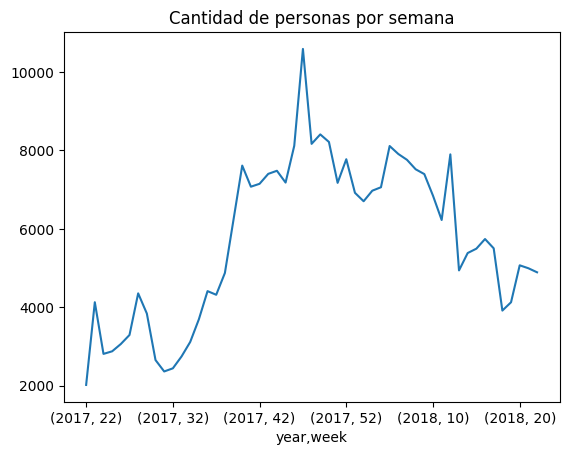

In [6]:
#Cantidad de personas por semana
per_week = df_visitas.groupby(['year', 'week'])['uid'].nunique()
print(per_week.plot(title='Cantidad de personas por semana'))

Conclusión del grafico:
- La semana en la que menos personas visitaron el sitio web fue en la semana 22 del año 2018.
- la semana con las visitas en el sitio web fue entre la 47 y 48 del año 2017.
- Entre la semana 31 y 40 del año 2017 el sitio web tuvo en crecimiento importante el numero de personas que visitaron el sitio web.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Mismo comentario anterior, nota como las semanas quedaron desordenadas.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, ahora están en el orden correcto

</div>

year  month  day
2017  6      1       605
             2       608
             3       445
             4       476
             5       820
                    ... 
2018  5      27      620
             28     1039
             29      948
             30     1289
             31     1997
Name: uid, Length: 364, dtype: int64


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '(2018, 4, 12)'),
  Text(0.0, 0, '(2017, 6, 1)'),
  Text(50.0, 0, '(2017, 7, 21)'),
  Text(100.0, 0, '(2017, 9, 9)'),
  Text(150.0, 0, '(2017, 10, 29)'),
  Text(200.0, 0, '(2017, 12, 18)'),
  Text(250.0, 0, '(2018, 2, 6)'),
  Text(300.0, 0, '(2018, 3, 28)'),
  Text(350.0, 0, '(2018, 5, 18)'),
  Text(400.0, 0, '')])

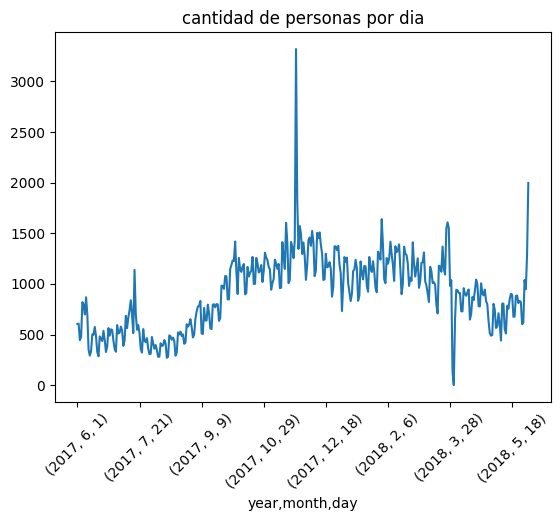

In [7]:
# Cantidad de personas por dia
per_day = df_visitas.groupby(['year', 'month', 'day'])['uid'].nunique()
print(per_day)
per_day.plot(title='cantidad de personas por dia')
plt.xticks(rotation=45)

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Mismo comentario anterior, nota como los días quedaron desordenados.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Correcto

</div>

#### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

AxesSubplot(0.125,0.11;0.775x0.77)


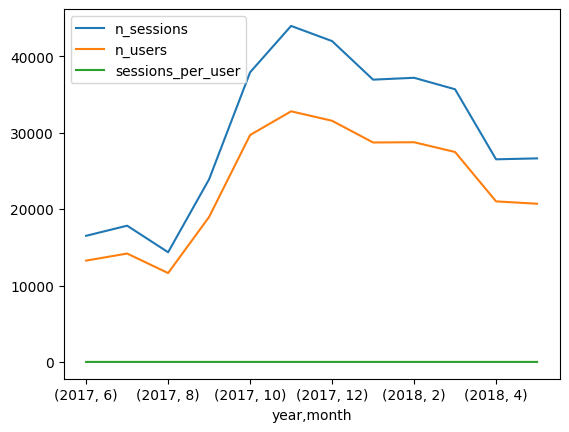

In [8]:
sessions_per_user = df_visitas.groupby(['year', 'month']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print(sessions_per_user.plot())

Conclusion: 
Efectivamente, un usuario puede tener varias sesiones.


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero presenta un gráfico ocn la métrica calculada. Idealmente un gráfico de línea que muestra la variación de esa medida en el tiempo

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, pero sessions_per_user deberías haberlo mostrado en otro gráfico, puesto en el mismo gráfico que las otras dos métricas hace que se confunda

</div>

#### Duración de cada sesion

0    60
dtype: int64


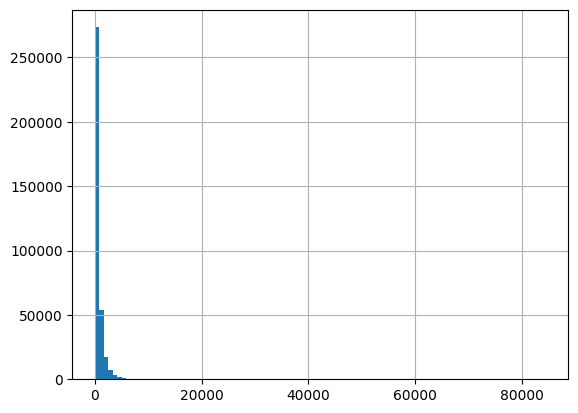

In [9]:
df_visitas['session_duration_sec'] = (
    df_visitas['end_ts'] - df_visitas['start_ts']
).dt.seconds
df_visitas['session_duration_sec'].hist(bins=100)
grafico_dur_sesion = df_visitas['session_duration_sec'].mode()
print(grafico_dur_sesion)


Conclusion: 
- la duracion promedio de cada sesion es de 60 segundos 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto. El histograma permite visualizar que si bien la media es 60 segundos, hay sesiones mucho más largas, aunque toda la data se concentra principalmente en valores pequeños.

</div>

#### Con qué frecuencia los usuarios y las usuarias regresan?

In [10]:
mau_total = (
   df_visitas.groupby(['year', 'month'])
    .agg({'uid': 'nunique'})
    .mean()
)

dau_total = (
    df_visitas.groupby('date').agg({'uid': 'nunique'})
    .mean()
)

wau_total = (
    df_visitas.groupby(['year', 'week'])
    .agg({'uid': 'nunique'})
    .mean()
)

#Calcular el factor de adherencia

# semanal
sticky_wau = dau_total / wau_total * 100
print("La proporcion de usuarios que regresan semanalmente es", sticky_wau)

#mensual
sticky_mau = dau_total / mau_total * 100
print("La proporcion de usuarios que regresan mensualmente es", sticky_mau)

La proporcion de usuarios que regresan semanalmente es uid    15.884409
dtype: float64
La proporcion de usuarios que regresan mensualmente es uid    3.90897
dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto con el sticky factor. Esto nos indica rápidamente la proporción de usuarios que regresan

</div>

## Pedidos 


#### ¿Cuándo la gente empieza a comprar?

In [11]:
# Creando la cohorte

first_order_date = df_pedidos.groupby('uid')[
    'buy_ts'
].min()
first_order_date.name = 'first_order_datetime'
df_pedidos = df_pedidos.join(first_order_date, on='uid')
df_pedidos['order_month'] = df_pedidos['buy_ts'].astype(
    'datetime64[M]'
)
df_pedidos['first_order_month'] = df_pedidos[
    'first_order_datetime'
].astype('datetime64[M]')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, correcto

</div>

In [25]:
#Primer visita del usuario
uno_visita = df_visitas.groupby(['uid', 'source_id'])['start_ts'].min()
uno_visita = pd.DataFrame(uno_visita).reset_index()
uno_visita['start_ts'] = pd.to_datetime(uno_visita['start_ts']).dt.date
uno_visita.rename(columns={'start_ts': 'primer_visita_cliente'}, inplace=True)

#Primer pedido del usuario
primer_pedido_cliente = df_pedidos.groupby('uid')['buy_ts'].min()
primer_pedido_cliente = pd.DataFrame(primer_pedido_cliente).reset_index()
primer_pedido_cliente['buy_ts'] = pd.to_datetime(primer_pedido_cliente['buy_ts']).dt.date
primer_pedido_cliente.rename(columns={'buy_ts': 'primer_pedido_cliente'}, inplace=True)

#unimos primer visita con primer pedido

df_visita_pedido = uno_visita.merge(primer_pedido_cliente, on='uid')
df_visita_pedido['tiempo_conversion'] = df_visita_pedido['primer_pedido_cliente'] - df_visita_pedido['primer_visita_cliente']


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

El resultado es incorrecto. La obtención de la primera visita debe ser de forma general, no por fuente, es decir, no agrupes por fuente y usuario, agrupa solamente por usuario. Además, realiza algo similar para las ordenes y obtén la primera compra de cada usuario. Luego une estos dos resultados y con eso calcula el tiempo de conversión (tiempo desde primera visita hasta primera compra)

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Muy bien, ahora es correcto  

</div>

In [34]:
# Convertir el tipo de dato
df_visita_pedido['dias_conversion'] = df_visita_pedido['tiempo_conversion'].dt.days

In [39]:
df_visita_pedido['tiempo_conversion'].max()
df_visita_pedido['dias_conversion'].max()

363

<AxesSubplot:title={'center':'Promedio de dias que demoran las personas en convertirse a clientes por cada fuente'}, xlabel='Fuente', ylabel='Promedio de dias'>

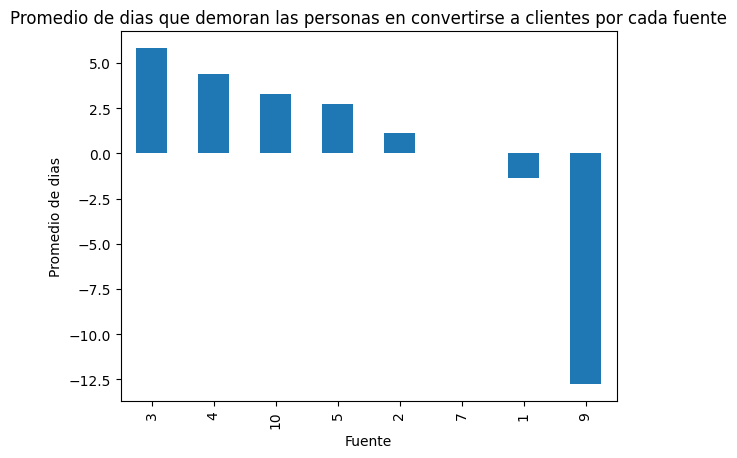

In [37]:
df_visita_pedido.groupby('source_id')['dias_conversion'].mean().sort_values(ascending=False).plot(kind='bar', title='Promedio de dias que demoran las personas en convertirse a clientes por cada fuente', xlabel='Fuente', ylabel='Promedio de dias')


Conclusiones:
    - la fuente mas efectiva de conversion es la id 10.

In [43]:
conversion_diez_dias = df_visita_pedido[df_visita_pedido['dias_conversion'] <= 10]
conversion_diez_dias.groupby(['source_id', 'dias_conversion']).size().unstack(fill_value=0).plot(kind='bar', title='Cantidad de personas que se convierten en los primeros 10 dias por cada fuente')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
conversion_die_dias = df_final[df_final['conversion_days'] >= 340]
conversion_die_dias.groupby(['source_id', 'conversion_days']).size().unstack(fill_value=0).plot(kind='bar')

Conclusiones:
- Entre todas las fuentes, la fuente con id 1 es que la que tiene mas personas que se demoran en convertirse.

In [ ]:
df_final.groupby('source_id')['conversion_days'].value_counts().sort_values(ascending=False).head(20).unstack(fill_value=0).plot(kind='bar', title='Top 20 de los dias mas comunes que las personas se convierten')

In [ ]:
# La fuente de anuncios que mas trae clientes
print(f'Cantidad de personas que trajo cada fuente:')
print(df_visitas['source_id'].value_counts())

Conclusiones:
- La fuentes que mas clientes trajo fue id 4 con mas de 101000 personas.
- Aunque la fuente id 4 es la que tiene mas cantidad de personas que se convierten el mismo dia, la fuente id 10 con tan solo 10025 personas traidas, tiene un mejor promedio de conversion que la 4.
- La fuente 1 con 34121 personas traidas, tiene un promedio de conversion de 150 dias a cambio de la id 4 que tiene un promedio de 105 dias.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [ ]:
#Cantidad de pedidos por cada cohorte
order_month = df_pedidos.groupby('first_order_month')['uid'].count()
print(order_month)


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, correcto

</div>

<AxesSubplot:title={'center':'Pedidos realizados por cada cohorte en el transcurso de todos los meses'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

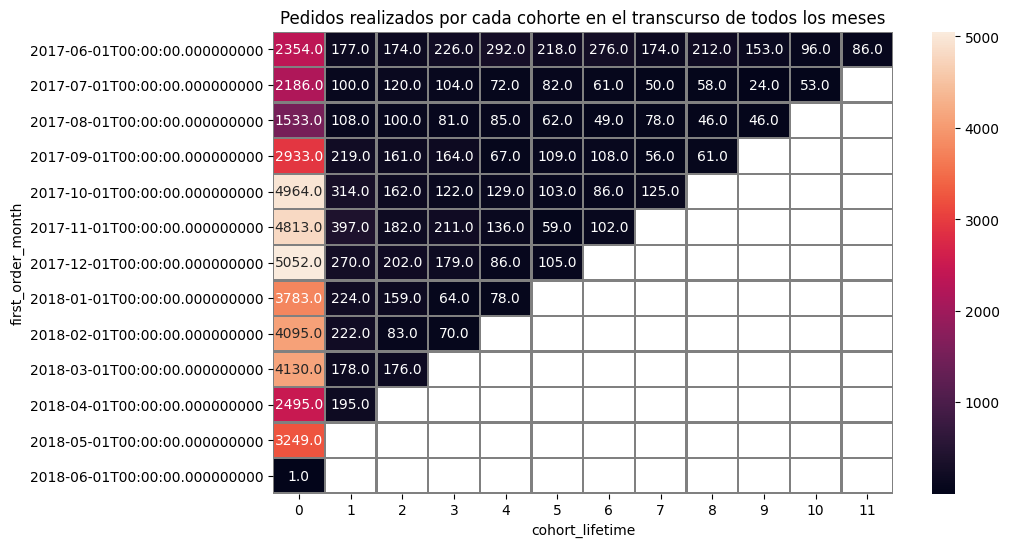

In [44]:
# Pedidos agrupados por cohortes y mes de vida

order_grouped_by_cohorts = df_pedidos.groupby(['first_order_month', 'order_month']).agg({'uid':'count'})
order_grouped_by_cohorts = order_grouped_by_cohorts.reset_index()

order_grouped_by_cohorts['cohort_lifetime'] = (
    order_grouped_by_cohorts['order_month']
    - order_grouped_by_cohorts['first_order_month'])

order_grouped_by_cohorts['cohort_lifetime'] = order_grouped_by_cohorts[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
order_grouped_by_cohorts['cohort_lifetime'] = (
    order_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
)
lifetime_pivot = order_grouped_by_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='uid', aggfunc='sum')

plt.figure(figsize=(10, 6))
plt.title('Pedidos realizados por cada cohorte en el transcurso de todos los meses')
sns.heatmap(
    lifetime_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, el cálculo por cohorte sirve para ver cómo ha cambiado el comportamiento de los usuarios en el tiempo.

</div>

#### ¿Cuál es el tamaño promedio de compra?

In [ ]:
# Agregamos el mes de vida al df
df_pedidos['cohort_lifetime'] = (
    df_pedidos['order_month']
    - df_pedidos['first_order_month'])
df_pedidos['cohort_lifetime'] = df_pedidos[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
df_pedidos['cohort_lifetime'] = (
    df_pedidos['cohort_lifetime'].round().astype('int'))

# Agrupamos y calculamos los datos
tamano_compra = df_pedidos.groupby(['first_order_month', 'cohort_lifetime'])['revenue'].mean().reset_index()

#Visualizamos la información
tamano_compra.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue', aggfunc='mean').fillna(" ")


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto. Observa que, en general, las cohortes tienden a aumentar su compra promedio a medida que pasa el tiempo, pero eso ocurre ya que menos usuarios compran, quedan los que hacen compras más grandes

</div>

#### ¿Cuánto dinero traen? (LTV)

In [48]:
# Agregamos la columna 'month' al df
df_costos['month'] = df_costos['date'].astype('datetime64[M]')
df_costos['month'] = pd.to_datetime(df_costos['month'])

# Encontrar la fecha de la primera compra
first_orders = df_pedidos.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

# Calcular el numero de nuevos clientes para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Definimos un margen de beneficio del 30%
margin_rate = 0.3

cohorts = (
    df_pedidos.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#Calculamos LTV
report['ltv'] = (report['gp'] / report['n_buyers'])

# calcula la tabla dinámica con el LTV
tabla_ltv = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

# Aplicamos cumsum(axis=1) para obtener el LTV acumulado
tabla_ltv_acumulado = tabla_ltv.cumsum(axis=1)

# Rellenamos NaNs con cadenas vacías para mejor visualización
tabla_ltv_acumulado = tabla_ltv_acumulado.fillna('')
tabla_ltv_acumulado

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.417324,1.562923,1.694214,1.980615,2.287375,2.508025,2.793157,2.967635,3.133599,3.315335,3.486713,3.56377
2017-07-01,1.803066,1.903629,2.090688,2.198381,2.251418,2.298232,2.334295,2.376841,2.425211,2.469354,2.516056,
2017-08-01,1.582955,1.724553,1.862098,1.979481,2.127696,2.212758,2.275958,2.39746,2.485123,2.541517,,
2017-09-01,1.693359,2.028635,2.184914,3.377651,3.497819,3.691939,3.902421,3.975366,4.030568,,,
2017-10-01,1.501120,1.661849,1.719267,1.76641,1.811878,1.847987,1.873432,1.908073,,,,
2017-11-01,1.546405,1.666175,1.726042,1.823527,1.867931,1.884095,1.918573,,,,,
2017-12-01,1.421457,1.499569,1.777099,2.096681,2.19056,2.291974,,,,,,
2018-01-01,1.240691,1.329118,1.420403,1.463236,1.482045,,,,,,,
2018-02-01,1.247096,1.330578,1.354133,1.376376,,,,,,,,


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, el cálculo base del LTV es correcto pero esta métrica se presenta de forma acumulada. Aplica cumsum(axis=1) al resultado final.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, ahora el resultado está con el cálculo correcto.
</div>

### Marketing

In [49]:
# Calcular el número de nuevos clientes para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

df_costos['cohorte'] = df_costos['date'].dt.to_period('M').dt.start_time
costs_cohorte_source = df_costos.groupby(['cohorte', 'source_id'], observed=True)['costs'].sum().reset_index()
costs_cohorte_source = costs_cohorte_source.rename(columns={"costs": "total_cost"}).reset_index()


#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

<AxesSubplot:title={'center':'Costos de marketing por cada mes'}, xlabel='month'>

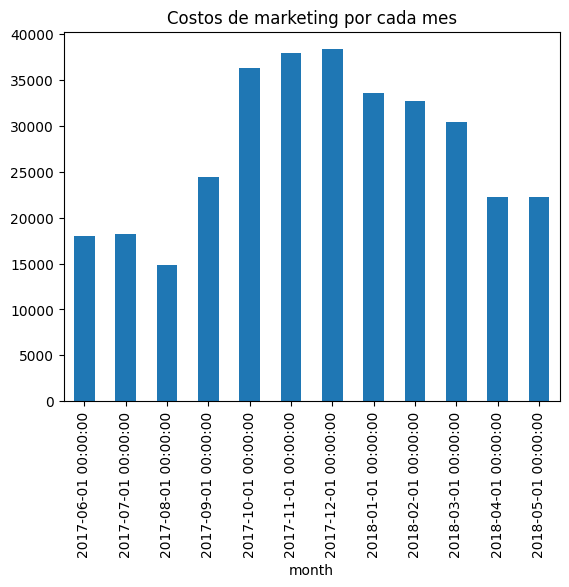

In [50]:
# Dinero que se gasto en total por cada cohorte
df_costos.groupby('month')['costs'].sum().plot(kind='bar', title='Costos de marketing por cada mes')


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, esto muestra el gasto total mensual.
</div>

<AxesSubplot:title={'center':'Ingresos por cada mes'}, xlabel='month'>

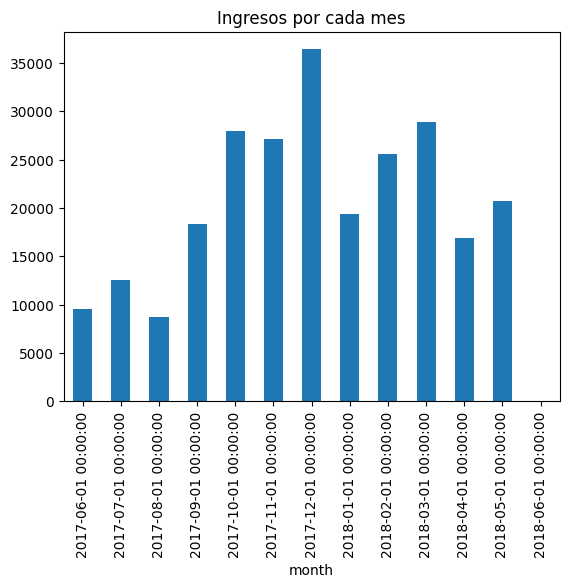

In [45]:
# Ingresos por cada mes_
df_pedidos['month'] = df_pedidos['buy_ts'].astype('datetime64[M]')
df_pedidos['month'] = pd.to_datetime(df_pedidos['month'])
df_pedidos.groupby('month')['revenue'].sum().plot(title='Ingresos por cada mes', kind='bar')

<Figure size 1000x600 with 0 Axes>

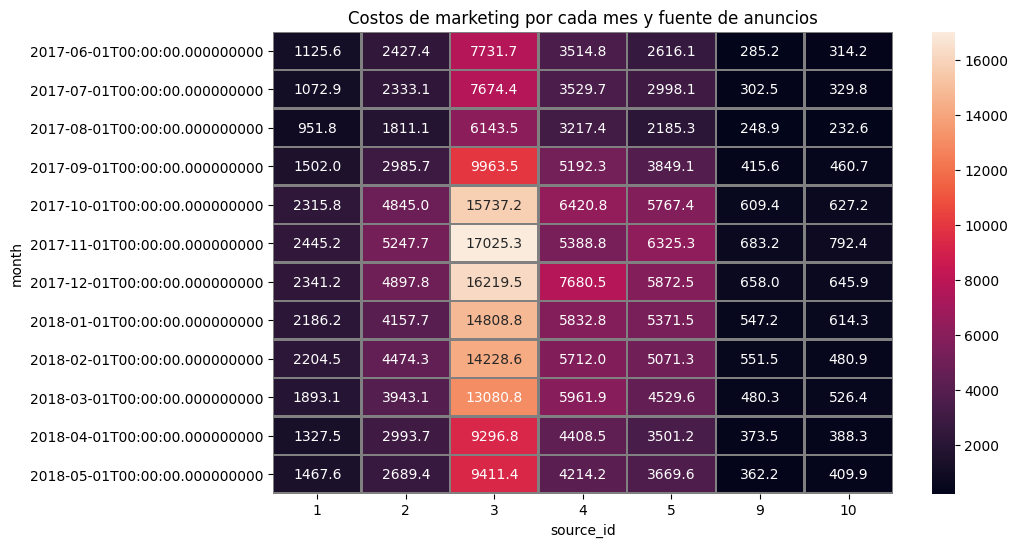

<Figure size 1000x600 with 0 Axes>

In [51]:
# Calcule el costo total de adquisición por cohorte (first_order_month) y fuente
costos_fuente_tiempo = df_costos.groupby(['month', 'source_id']).agg({'costs':'sum'})
costos_fuente_tiempo = costos_fuente_tiempo.reset_index()
tabla_costos_fuente = costos_fuente_tiempo.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')

# Pivote los costos para obtener los costos totales por cohorte y fuente
tabla_costos_fuente
plt.figure(figsize=(10, 6))
plt.title('Costos de marketing por cada mes y fuente de anuncios')
sns.heatmap(
    tabla_costos_fuente,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',)
plt.figure(figsize=(10, 6))



In [ ]:
tabla_costos_fuente.plot()
plt.title('Costos de marketing por cada mes y fuente de anuncios')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, esto cumple con lo solicitado, se puede observar la evolución del gasto a través del tiempo para cada fuente. Sin embargo, me parece que hubiese sido mejor un gráfico de línea, donde se tenga una serie para cada fuente.

</div>

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [54]:
# Primera visita usuarios por fuente
primer_visita = (df_visitas[['uid','start_ts','source_id']].sort_values(by='start_ts',ascending=True).groupby('uid',as_index=False).first())

#Extraer el mes
primer_visita['month'] = primer_visita['start_ts'].astype('datetime64[M]')

# Costos mensual por fuente
primer_visita =primer_visita.merge(df_costos.groupby(['source_id', 'month']).agg({'costs':'sum'}), left_on=['source_id', 'month'], right_on=['source_id', 'month'])

# Calcular el número de usuarios por fuente y mes 
primer_visita = primer_visita.merge(primer_visita.groupby(['source_id', 'month']).agg({'uid': 'nunique'}).rename(columns={'uid': 'n_buyers'}).reset_index(), left_on=['source_id', 'month'], right_on=['source_id', 'month'])

primer_visita['cac'] = (primer_visita['costs']/primer_visita['n_buyers'])

cac_pivot = primer_visita.pivot_table(index='month', columns='source_id', values='cac', aggfunc='mean')
cac_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1.783851,1.923439,1.895012,1.019669,0.958988,0.400028,0.793485
2017-07-01,1.986815,1.928190,2.084294,0.967845,0.897378,0.682935,1.203723
2017-08-01,2.593488,2.498000,2.054009,1.219621,0.771366,0.599831,1.102227
2017-09-01,2.189519,2.425394,1.970639,1.165229,0.891830,0.807029,1.042240
2017-10-01,2.243944,2.511664,2.163789,0.822552,0.887019,1.000673,0.763995
2017-11-01,2.187084,2.394015,2.026585,0.619690,1.190764,0.829102,1.127112
2017-12-01,2.208679,2.739262,2.180922,0.854335,1.202892,1.069886,1.326201
2018-01-01,2.637129,2.781097,2.195520,0.754761,1.169501,1.139917,0.819133
2018-02-01,2.490938,2.978921,2.091205,0.798652,1.113106,1.214758,0.571116


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

El cálculo del CAC es incorrecto, nota que estás uniendo todos los usuarios a cada una de las fuentes. En realidad, hay que asociar los usuarios que "entraron" por una fuente con los costos de esa fuente. Para ello requieres la primera fuente de cada usuario (la fuente por la que fue adquirido). En la data puedes obtener la fuente de la primera visita, asociarla al usuario y luego obtener cuántos usuarios fueron adquiridos por cada fuente y mes. Esto último lo unes al costo mensual por fuente y obtienes el CAC.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Muy bien, ahora es correcto  

</div>

In [ ]:
# Total de costos por fuente

costos_por_fuente = df_costos.groupby('source_id')['costs'].sum()
costos_por_fuente

In [ ]:
# Total de visitantes por cada fuente
df_visitas.groupby('source_id')['uid'].nunique()

In [ ]:
df_unido.groupby('source_id')['uid'].nunique()

Conclusiones:
   - la fuente id 3, es en la que mas se ha gastado en marketing.
   - La fuente id 4 a comparación de la 3, tiene menos gastos en marketing, mas visitantes y mas personas convertidas a clientes.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Este cálculo es incorrecto. El CAC es el costo de adquisición de los usuarios, para esto debes tener los usuarios adquiridos (que hicieron al menos una compra) y la fuente por la que fueron adquiridos (fuente de su primera visita).
    
La inversión de marketing es variable según el día y la fuente, de la misma forma que el ingreso de usuarios varia por día y fuente. Debes juntar el gasto de mkt por día y fuente con la cantidad de usuarios compradores que fueron obtenidos por esa fuente. Con ello obtienes un cac para cada día y fuente, luego puedes agrupar por fuente y obtener un promedio del cac diario. Te dejo un esquema de cómo realizar esto.
    
- Para cada usuario debes tener la fuente de la primera visita y la fecha de la primera compra
- Agrupa lo anterior por fuente y fecha para contar la cantidad diferente de compradores
- A lo anterior une los costos por fecha y fuente.
- El cac diario es el costo del día, dividido la cantidad de compradores
- Obtén un cac por fuente: agrupa los cac diarios por fuente y obtén el promedio como el cac por fuente   
</div>

#### ¿Cuán rentables eran las inversiones? (ROMI)

In [55]:
# Primera visita usuarios
first_visit_users = (df_visitas[['uid','start_ts','source_id']].sort_values(by='start_ts',ascending=True).groupby('uid',as_index=False).first())

# Mes de primera visita usuarios
first_visit_users['first_visit_month'] = first_visit_users['start_ts'].astype('datetime64[M]')

# Primera orden usuarios
first_order_users = (df_pedidos[['uid','buy_ts']].sort_values(by='buy_ts',ascending=True).groupby('uid',as_index=False).first())

# Mes de primera orden usuarios
first_order_users['first_order_month'] = first_order_users['buy_ts'].astype('datetime64[M]')

# Seleccionar columnas a usar de visitas
first_visit_users = first_visit_users[['uid','source_id','first_visit_month']]

# Unir data de primera orden a dataframe orders
orderes = pd.merge(df_pedidos,first_order_users[['first_order_month','uid']],on='uid')

# Obtener mes de compra
orderes['order_month'] = orderes['buy_ts'].astype('datetime64[M]')

# Seleccionar columnas a usar de ordenes
buyers = orderes[['uid','first_order_month_x','revenue','order_month']]

# Unir data de ordenes con data de visitas
buyers = pd.merge(buyers,first_visit_users,on='uid')

# Generar columna de mes en los costos
df_costos['month'] = df_costos['date'].astype('datetime64[M]')


age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         1.22  1.59  1.97  2.60  3.32  3.67  4.10  4.53  4.91  5.19   
2017-07-01         1.09  1.25  2.05  2.27  2.41  2.54  2.61  2.70  2.83  2.98   
2017-08-01         0.89  1.03  1.15  1.27  1.39  1.47  1.55  1.86  2.13  2.22   
2017-09-01         0.91  1.18  1.27  1.41  1.41  1.43  1.44  1.49  1.57   NaN   
2017-10-01         0.88  1.04  1.07  1.13  1.14  1.16  1.18  1.23   NaN   NaN   
2017-11-01         0.98  1.06  1.18  1.30  1.32  1.34  1.35   NaN   NaN   NaN   
2017-12-01         0.65  0.69  0.73  0.77  0.77  0.78   NaN   NaN   NaN   NaN   
2018-01-01         0.63  0.64  0.65  0.76  0.76   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.58  0.71  0.72  0.76   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         1.39  1.67  1.79   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.63  0.6

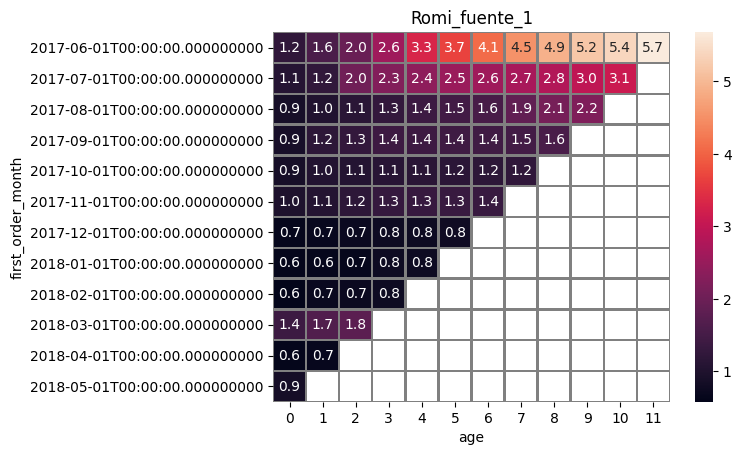

<Figure size 1000x600 with 0 Axes>

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.43  0.48  0.50  0.69  0.85  0.94  1.10  1.24  1.37  1.44   
2017-07-01         0.75  0.82  0.83  0.85  0.89  0.91  0.94  0.95  0.96  0.98   
2017-08-01         0.39  0.45  0.47  0.48  0.52  0.52  0.53  0.56  0.56  0.56   
2017-09-01         0.61  1.21  1.39  1.46  1.56  1.63  1.88  1.94  1.98   NaN   
2017-10-01         0.63  0.83  0.88  0.93  0.97  0.99  1.00  1.02   NaN   NaN   
2017-11-01         0.53  0.60  0.63  0.69  0.72  0.73  0.74   NaN   NaN   NaN   
2017-12-01         0.69  0.81  1.53  2.39  2.63  2.88   NaN   NaN   NaN   NaN   
2018-01-01         0.31  0.38  0.50  0.52  0.54   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.35  0.40  0.42  0.44   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.45  0.52  0.62   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.40  0.4

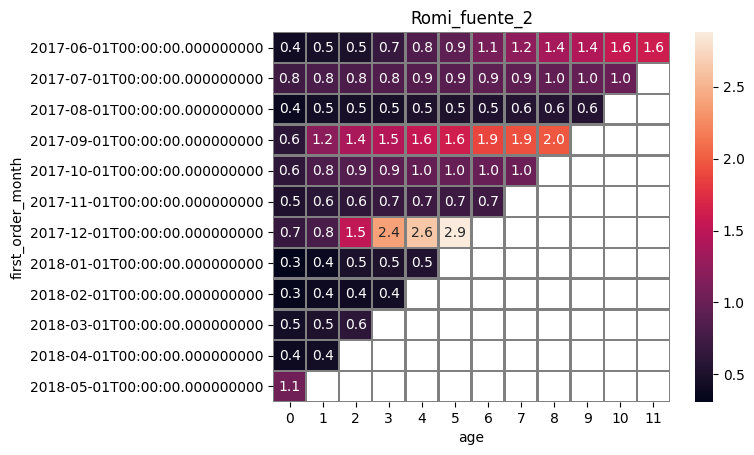

<Figure size 1000x600 with 0 Axes>

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.36  0.37  0.39  0.41  0.43  0.44  0.45  0.46  0.46  0.47   
2017-07-01         0.41  0.42  0.43  0.46  0.46  0.47  0.47  0.48  0.48  0.49   
2017-08-01         0.28  0.29  0.30  0.31  0.32  0.32  0.32  0.33  0.33  0.34   
2017-09-01         0.44  0.46  0.48  0.49  0.51  0.51  0.52  0.53  0.54   NaN   
2017-10-01         0.35  0.38  0.39  0.40  0.41  0.41  0.41  0.42   NaN   NaN   
2017-11-01         0.32  0.33  0.34  0.35  0.35  0.35  0.36   NaN   NaN   NaN   
2017-12-01         0.34  0.35  0.36  0.37  0.38  0.38   NaN   NaN   NaN   NaN   
2018-01-01         0.28  0.29  0.30  0.31  0.31   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.29  0.31  0.32  0.33   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.32  0.33  0.35   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.30  0.4

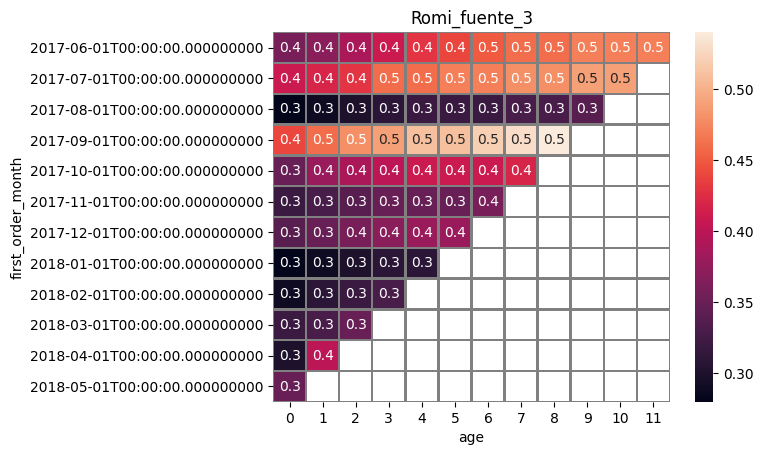

<Figure size 1000x600 with 0 Axes>

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.56  0.56  0.58  0.64  0.77  0.95  1.11  1.14  1.17  1.26   
2017-07-01         0.81  0.82  0.83  0.86  0.86  0.87  0.89  0.89  0.91  0.92   
2017-08-01         0.53  0.55  0.56  0.59  0.61  0.63  0.64  0.66  0.67  0.68   
2017-09-01         0.54  0.60  0.63  0.66  0.67  0.70  0.84  0.87  0.88   NaN   
2017-10-01         0.80  0.82  0.85  0.87  0.89  0.91  0.93  0.94   NaN   NaN   
2017-11-01         1.12  1.26  1.29  1.38  1.42  1.43  1.48   NaN   NaN   NaN   
2017-12-01         0.75  0.76  0.78  0.80  0.80  0.82   NaN   NaN   NaN   NaN   
2018-01-01         0.67  0.69  0.71  0.72  0.72   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.79  0.81  0.82  0.82   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.83  0.84  0.86   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.78  0.8

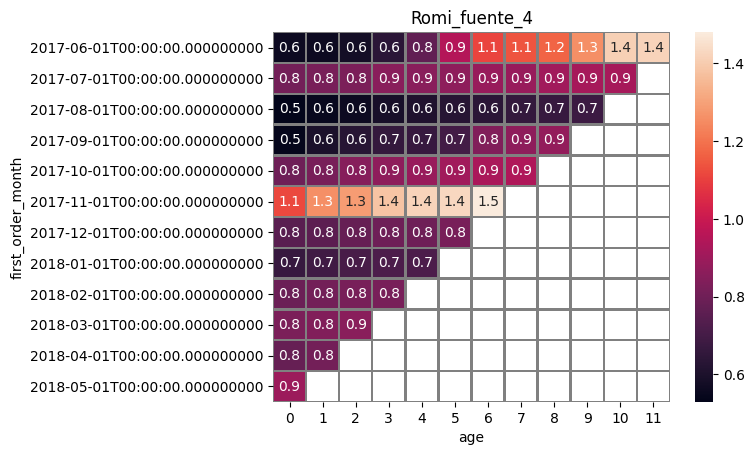

<Figure size 1000x600 with 0 Axes>

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.73  0.86  0.92  1.05  1.15  1.19  1.33  1.41  1.49  1.63   
2017-07-01         0.75  0.79  0.86  0.88  0.89  0.91  0.91  0.92  0.94  0.95   
2017-08-01         0.83  0.96  1.09  1.21  1.39  1.49  1.55  1.59  1.63  1.67   
2017-09-01         0.95  0.98  1.03  3.50  3.62  3.93  3.97  4.00  4.00   NaN   
2017-10-01         0.83  0.87  0.89  0.91  0.93  0.95  0.97  0.99   NaN   NaN   
2017-11-01         0.50  0.52  0.53  0.54  0.55  0.56  0.57   NaN   NaN   NaN   
2017-12-01         0.66  0.68  0.69  0.69  0.70  0.70   NaN   NaN   NaN   NaN   
2018-01-01         0.51  0.57  0.62  0.62  0.63   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.58  0.59  0.60  0.60   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.56  0.56  0.57   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.51  0.5

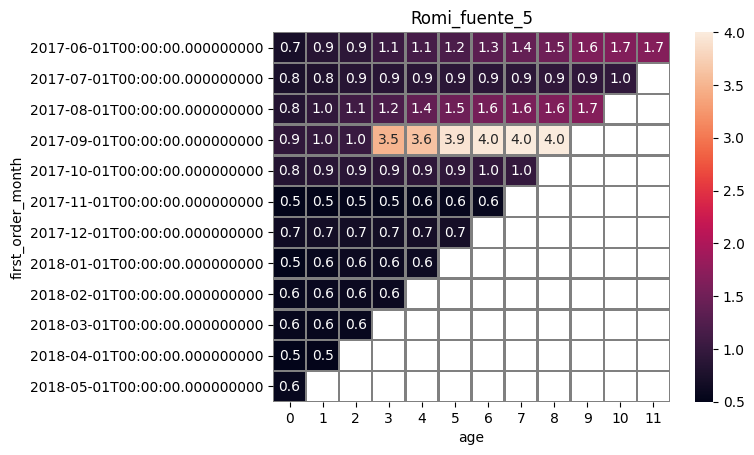

<Figure size 1000x600 with 0 Axes>

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.85  0.87  1.01  1.15  1.22  1.32  1.45  1.48  1.61  1.64   
2017-07-01         0.77  0.80  0.90  0.99  1.05  1.06  1.11  1.12  1.19  1.20   
2017-08-01         1.00  1.05  1.20  1.26  1.27  1.29  1.32  1.40  1.42  1.45   
2017-09-01         0.90  1.11  1.25  1.41  1.54  1.57  1.69  1.83  2.02   NaN   
2017-10-01         1.05  1.16  1.25  1.27  1.33  1.44  1.45  1.45   NaN   NaN   
2017-11-01         0.79  0.82  0.86  0.92  0.95  0.96  0.96   NaN   NaN   NaN   
2017-12-01         0.70  0.76  0.79  0.84  0.85  0.87   NaN   NaN   NaN   NaN   
2018-01-01         0.41  0.45  0.48  0.48  0.48   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.73  0.76  0.77   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.88  0.91  0.93   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.59  0.6

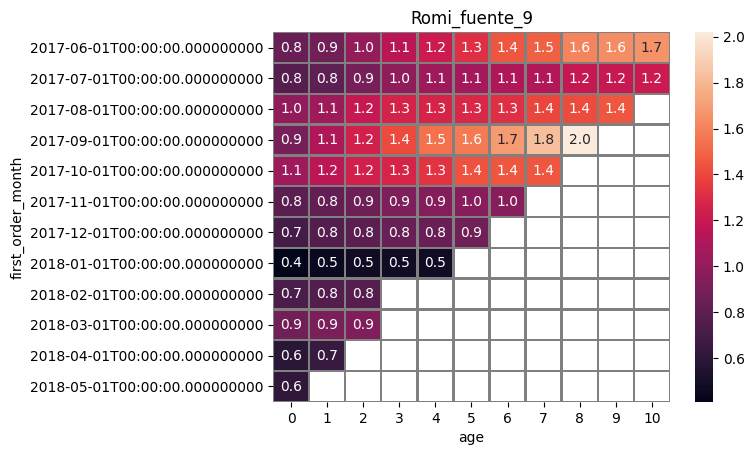

<Figure size 1000x600 with 0 Axes>

age                   0     1     2     3     4     5     6     7     8    9
first_order_month                                                           
2017-06-01         0.73  0.77   NaN   NaN   NaN   NaN   NaN   NaN  0.77  NaN
2017-07-01         0.54  0.54   NaN  0.56   NaN   NaN   NaN   NaN  0.56  NaN
2017-08-01         0.80  0.81  0.87   NaN   NaN   NaN   NaN  0.89   NaN  0.9
2017-09-01         0.42  0.43  0.44  0.48  0.49   NaN   NaN  0.49  0.49  NaN
2017-10-01         0.87  0.90  0.90  0.91  0.92  0.93  0.93  0.95   NaN  NaN
2017-11-01         0.75  0.76  0.76  0.79  0.80  0.81  0.82   NaN   NaN  NaN
2017-12-01         0.50  0.52   NaN   NaN   NaN  0.52   NaN   NaN   NaN  NaN
2018-01-01         0.46  0.47  0.48   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2018-02-01         0.63  0.66  0.66   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2018-03-01         1.21  1.24  1.25   NaN   NaN   NaN   NaN   NaN   NaN  NaN
2018-04-01         0.67   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN

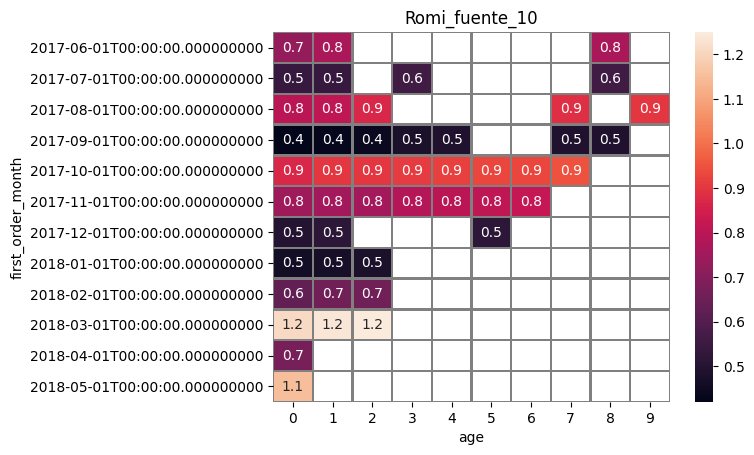

<Figure size 1000x600 with 0 Axes>

In [56]:
# Bucle para itenerar sobre todas las fuentes

for source, df in buyers.groupby('source_id'):
    if source != 7:
        cohort_sizes = (
    df.groupby(['source_id','first_order_month_x'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
        cohort_sizes.columns = ['source_id','first_order_month', 'n_buyers']
        
        cohort_revenue = (
    df.groupby(['source_id','first_order_month_x', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
        cohort_revenue.columns = ['source_id','first_order_month', 'order_month', 'gp']
       
        
        romi = pd.merge(cohort_sizes, cohort_revenue, on=['source_id', 'first_order_month'])
        romi['age'] = ((romi['order_month'] - romi['first_order_month'])/ np.timedelta64(1,'M')).round().astype('int')
        romi['ltv'] = (romi['gp'] / romi['n_buyers'])
        romi = romi.merge(df_costos.groupby(['source_id', 'month']).agg({'costs':'sum'}), left_on=['source_id', 'first_order_month'], right_on=['source_id', 'month'])
        romi['cac'] = (romi['costs']/romi['n_buyers'])
        romi['romi'] = (romi['ltv']/ romi['cac'])
        
        romi_pivot = romi.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)
        print(romi_pivot)
        plt.title(f'Romi_fuente_{source}')
        sns.heatmap(
    romi_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',)
        plt.figure(figsize=(10, 6))
        plt.show()
       
        

        

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Excelente, el cálculo del ROMI es el adecuado. Nota que dado que a medida que avanza el tiempo solo aumenta el ingreso, los costos son fijos pues son los que se utilizaron para traer los usuarios. 

</div>

- Solo en las cohortes de junio y noviembre, se ve reflejado que se recupero la inversion y genero beneficio.

fuente 5

- en las primeras 5 cohortes se ve reflejado el retorno de la inversion, en cada una de ella. Pero enfocandonos en la cuarta esta genero hasta cuatro veces mas ganancia en varios meses de vida. pero en las demas cohortes no se reflejado la rcuperacion de la inversión.

Fuente 9
- En las primeras seis cohortes se ven reflejados un rapido retorno de la inversion, en la mayoria de sus meses de vida.


- En ninguna de las cohortes, ni en su ciclo de vida ha dado los resultados esperandos, cabe aclarar que se establecio un margen de benefio del 30%

- la cohorte 10,11 y 12 del 2017 son las que mas pedidos realizaron
 
El LTV se calculó con un margen de beneficio del 30% 

- las fuentes que mas gastaron en publicidad es la 3,4,5,2, siendo la 3 la que mas se gasto.
- Los meses en los que mas se gasto publicidad son octubre, noviembre, diciembre, enero, febrero y marzo.

- las fuente 1, 2 y 3 son las que cuestan mas a la hora de traer visitantes, y la fuente 4 es la que menos cuesta. Eso no quiere decir que todos que porque cueste menos sea que la que mas conversión tenga.

Rentabilidad de las inversiones en cada fuente

fuente 1: 
Es una fuente inestable.
- El tiempo de recuperación de la inversion de las primeras 6 cohortes es en el primer o segundo mes de vida.
- En las cohortes del mes dic, enero, y febrero. No se ha observado que se halla recuperado la inversión.
- En la cohorte de marzo nuevamente se recupera. 

Fuente 2:
- Cada tres mes surge una cohorte con buenos resultados, tocaria investigar si hay algo de fondo en esas campañas publicitarias que han dado resultados.

Fuente 3:
- En ninguna de las cohortes en sus meses de vida, se ve reflejado que se haya recuperado la inversion.

Fuente 4:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Ok, bien con las conclusiones. No es necesario que todas las fuentes tengan alguna conclusión, algunas son más relevantes para entender el panorama general.

</div>